In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%load_ext autoreload
%autoreload 2

# Read in HPA data

We just searched for "Mitochrondia" and "Peroxisome"

In [68]:
import pandas as pd

mt_hpa = (
    pd.read_csv('../data/hpa/Mitochondria.tsv', delimiter='\t')
        .dropna(subset=['Subcellular location', 'Molecular function'])
)

mt_loc_mask = mt_hpa['Subcellular location'].str.contains('Mito')
blood_cell_mask = mt_hpa['RNA blood cell distribution'].isin(['Detected in all', 'Detected in many', 'Detected in some'])


mt_hpa_filt = mt_hpa.loc[blood_cell_mask, :]

mt_genes_hpa = mt_hpa_filt['Gene'].tolist()


pex_genes_hpa = pd.read_csv('../data/hpa/Peroxisome.tsv', delimiter='\t')['Gene'].tolist()

print('Number of genes in Mitochondria: ', len(mt_genes_hpa))
print('Number of genes in Peroxisome: ', len(pex_genes_hpa))
print('Number of genes in both: ', len(set(mt_genes_hpa).intersection(pex_genes_hpa)))

shared_genes = set(mt_genes_hpa).intersection(pex_genes_hpa)
print('Shared genes: ', shared_genes)

Number of genes in Mitochondria:  799
Number of genes in Peroxisome:  189
Number of genes in both:  31
Shared genes:  {'CROT', 'PLAAT3', 'ACOT8', 'PRDX5', 'ACSL4', 'PNPLA8', 'ECI2', 'ECH1', 'ACSL3', 'DUT', 'GSTK1', 'PPRC1', 'PPARGC1B', 'LDHB', 'MUL1', 'PDK3', 'SOD1', 'ATAD1', 'MDH1', 'IDH2', 'LPIN1', 'AMACR', 'DNM1L', 'CRAT', 'STING1', 'IDH1', 'ACSL1', 'GNPAT', 'CAT', 'GPS2', 'HSDL2'}


# Load in STRING data

📂 Loading STRING interactions from: 9606.protein.links.detailed.v12.0.txt.gz (score ≥ 700)
📂 Loading STRING alias map from: 9606.protein.aliases.v12.0.txt.gz
🔍 Mapping 189 gene symbols to STRING IDs...
🔍 Mapping 799 gene symbols to STRING IDs...
🔍 Subsetting graph to genes of interest with distance ≤ 0...
🎨 Annotating node colors...
🔁 Relabeling nodes to gene symbols...


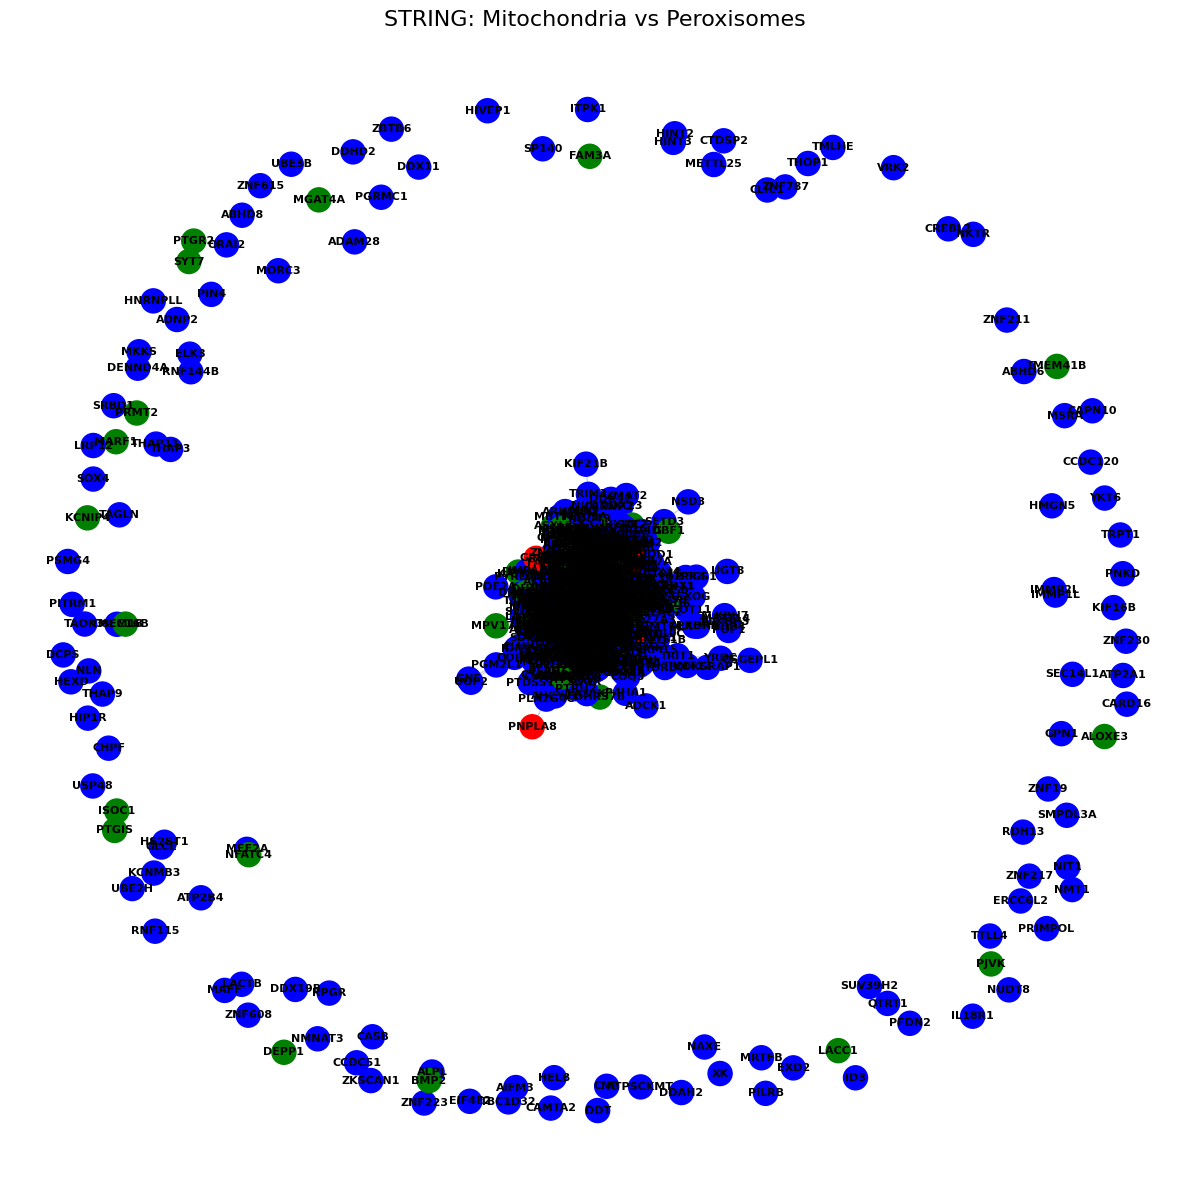

In [67]:
from stringutils import (
    load_string_network,
    load_alias_map,
    map_genes_to_string_ids,
    subset_graph,
    annotate_colors,
    relabel_graph_nodes,
    draw_colored_graph
)

# Step 1: Load network and alias map
G_full = load_string_network(score_threshold=700)
alias_df = load_alias_map()

# Step 2: Load your gene lists
pex_genes = pd.read_csv('../data/hpa/Peroxisome.tsv', sep='\t')['Gene'].tolist()

mt_hpa = pd.read_csv('../data/hpa/Mitochondria.tsv', sep='\t')
mt_hpa = mt_hpa.dropna(subset=['Subcellular location', 'Molecular function'])
mt_hpa = mt_hpa[mt_hpa['RNA blood cell distribution'].isin(['Detected in all', 'Detected in many', 'Detected in some'])]
mt_genes = mt_hpa['Gene'].tolist()

# Step 3: Map genes to STRING IDs
pex_to_str, str_to_pex = map_genes_to_string_ids(pex_genes, alias_df)
mt_to_str, str_to_mt = map_genes_to_string_ids(mt_genes, alias_df)

# Step 4: Subset the graph to neighborhood of genes
G_sub = subset_graph(
    G_full,
    gene_list=list(pex_to_str.keys()) + list(mt_to_str.keys()),
    symbol_to_string={**pex_to_str, **mt_to_str},
    distance=0
)

# Step 5: Annotate and relabel
G_sub = annotate_colors(G_sub, pex_to_str, mt_to_str)
G_sub = relabel_graph_nodes(G_sub, alias_df)

# Step 6: Plot
draw_colored_graph(G_sub, title="STRING: Mitochondria vs Peroxisomes")


In [78]:
for x in set(mt_genes_hpa).intersection(pex_genes_hpa):
    print(x)

CROT
PLAAT3
ACOT8
PRDX5
ACSL4
PNPLA8
ECI2
ECH1
ACSL3
DUT
GSTK1
PPRC1
PPARGC1B
LDHB
MUL1
PDK3
SOD1
ATAD1
MDH1
IDH2
LPIN1
AMACR
DNM1L
CRAT
STING1
IDH1
ACSL1
GNPAT
CAT
GPS2
HSDL2


In [72]:
nx.write_graphml(G, "../data/string_mito_perox.graphml")

EdgeView([('ARF5', 'KIF21B'), ('ARF5', 'PI4KB'), ('ARF5', 'PICK1'), ('ARF5', 'KLC2'), ('ARF5', 'KIF1B'), ('ARF5', 'KLC4'), ('ARF5', 'KLC1'), ('ARF5', 'CDKN2A'), ('ARF5', 'GBF1'), ('ARF5', 'KIF16B'), ('KIF21B', 'KIF22'), ('KIF21B', 'ZW10'), ('KIF21B', 'BNIP1'), ('KIF21B', 'MAPRE3'), ('KIF21B', 'KIF17'), ('KIF21B', 'SMO'), ('KIF21B', 'ARF3'), ('KIF21B', 'RINT1'), ('KIF21B', 'KLC4'), ('KIF21B', 'KIF13A'), ('KIF21B', 'KIF23'), ('KIF21B', 'KIF11'), ('KIF21B', 'KIF18A'), ('KIF21B', 'ARFGAP3'), ('KIF21B', 'USE1'), ('KIF21B', 'KIF1B'), ('KIF21B', 'KIF3C'), ('KIF21B', 'CENPE'), ('KIF21B', 'TMPO'), ('KIF21B', 'KIF2B'), ('KIF21B', 'NBAS'), ('KIF21B', 'KIF6'), ('KIF21B', 'STK36'), ('KIF21B', 'ERAP1'), ('KIF21B', 'KIF27'), ('KIF21B', 'KIFC2'), ('KIF21B', 'GPR25'), ('KIF21B', 'STX18'), ('KIF21B', 'ARF4'), ('KIF21B', 'ANTXR2'), ('KIF21B', 'KIF5B'), ('KIF21B', 'ARFGAP1'), ('KIF21B', 'KIF1C'), ('KIF21B', 'MKLN1'), ('KIF21B', 'KIF15'), ('KIF21B', 'TMEM39A'), ('KIF21B', 'KIF9'), ('KIF21B', 'NDEL1'), ('KI

In [ ]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

def query_and_color_string_network(pex_genes, mt_genes, species=9606, required_score=0.4):
    """
    Query STRING with two gene lists and return a colored NetworkX graph.
    
    Parameters:
        pex_genes (list of str): Peroxisomal gene symbols
        mt_genes (list of str): Mitochondrial gene symbols
        species (int): NCBI species ID
        required_score (float): Minimum confidence score (0-1)

    Returns:
        G (nx.Graph): NetworkX graph object
        node_colors (dict): Dictionary mapping node -> color
    """
    base_url = "https://string-db.org/api"
    output_format = "json"
    method = "network"
    request_url = f"{base_url}/{output_format}/{method}"

    all_genes = list(set(pex_genes) | set(mt_genes))
    identifiers = "%0d".join(all_genes)

    params = {
        "identifiers": identifiers,
        "species": species
    }

    response = requests.get(request_url, params=params)
    response.raise_for_status()
    interactions = response.json()

    # Build graph
    G = nx.Graph()
    for interaction in interactions:
        score = float(interaction['score'])
        if score >= required_score:
            a = interaction['preferredName_A']
            b = interaction['preferredName_B']
            G.add_edge(a, b, weight=score)

    # Assign colors
    node_colors = {}
    for node in G.nodes:
        in_pex = node in pex_genes
        in_mt = node in mt_genes
        if in_pex and in_mt:
            node_colors[node] = "red"
        elif in_pex:
            node_colors[node] = "blue"
        elif in_mt:
            node_colors[node] = "green"
        else:
            node_colors[node] = "gray"  # for unassigned nodes

    return G, node_colors
    
def draw_colored_graph(G, node_colors, layout=None):
    """
    Draw the graph with colored nodes using matplotlib.

    Parameters:
        G (nx.Graph): The graph
        node_colors (dict): node -> color
        layout (dict): Optionally provide a layout
    """
    pos = layout if layout else nx.spring_layout(G, seed=42)
    colors = [node_colors.get(node, "gray") for node in G.nodes()]
    
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="lightgray", font_size=8)
    plt.show()

In [38]:
# pex_genes = [
#     "PEX5", "PEX7", "PEX13", "PEX14", "PEX19",      # Peroxins (import machinery)
#     "ACOX1", "ACOX2", "ACOX3",                      # Acyl-CoA oxidases (fatty acid β-oxidation)
#     "ABCD1", "ABCD2", "ABCD3",                      # Transporters for VLCFAs
#     "CAT",                                          # Catalase (H₂O₂ detox)
#     "HSD17B4", "SCP2",                              # Multifunctional β-oxidation enzymes
#     "EHHADH", "AGPS", "GNPAT",                      # Ether lipid metabolism
#     "PMP70"                                         # Alternate name for ABCD3
# ]

# mt_genes = [
#     "MFN1", "MFN2", "OPA1",                         # Mitochondrial fusion
#     "DRP1", "FIS1",                                 # Fission machinery
#     "TFAM", "POLG", "TOMM20", "TIMM23",             # Import and mtDNA regulation
#     "SOD2", "PRDX3", "GPX1",                        # ROS detox enzymes
#     "ATP5F1A", "NDUFA9", "COX5A", "CYCS",           # OXPHOS Complexes I–V
#     "PGC1A", "NRF1", "SIRT1", "FOXO3",              # Mitochondrial biogenesis and stress signaling
# ]

G, node_colors = query_and_color_string_network(pex_genes_hpa, mt_genes_hpa)
draw_colored_graph(G, node_colors)


HTTPError: 414 Client Error: Request-URI Too Large for url: https://string-db.org/api/json/network?identifiers=ALKBH1%250dGFER%250dDDX41%250dSZT2%250dDTYMK%250dNUDT2%250dMCAT%250dPYCR2%250dABCB6%250dMRPS26%250dSRC%250dSLIRP%250dMYO5A%250dMARCHF5%250dSLC27A3%250dMED1%250dPTGR2%250dUBE3B%250dCOQ5%250dMTERF3%250dSERHL2%250dMTPAP%250dBRD8%250dCASP9%250dEXD2%250dHYKK%250dLIAS%250dCCR7%250dOAT%250dCANX%250dCCAR2%250dMRPL53%250dACAT1%250dARRB2%250dMCEE%250dNMT1%250dTHOP1%250dEIF4E2%250dLEP%250dTIMMDC1%250dPPARA%250dBCS1L%250dPARP9%250dATAD1%250dMTFMT%250dCMPK2%250dUGP2%250dDNM1L%250dMRM3%250dFAHD1%250dTBC1D15%250dPOP4%250dANGPTL4%250dMRPL38%250dIMMP1L%250dADNP2%250dACAA1%250dCAT%250dSDHAF2%250dHMOX1%250dID3%250dENY2%250dLGALS3%250dIKBKE%250dACTN4%250dUQCRFS1%250dMRPL42%250dRPL7L1%250dISOC1%250dMUTYH%250dMLYCD%250dAIFM2%250dLIG3%250dFKBP8%250dMGST1%250dMARF1%250dNCOA2%250dPRDX1%250dMAFF%250dMRPL22%250dTACO1%250dZNF217%250dVIM%250dAMBRA1%250dMRPS11%250dACOX3%250dGNE%250dSDHAF3%250dNDUFV2%250dDHODH%250dPPARGC1B%250dPLIN1%250dAPEX2%250dRALBP1%250dMAVS%250dLRRK2%250dMPST%250dBCKDHB%250dSOD1%250dPEX11B%250dMRPS31%250dTLCD3B%250dENSG00000258465%250dDDX46%250dNSD3%250dNUDT1%250dPXMP4%250dTAGLN%250dDHTKD1%250dHEATR1%250dSSBP1%250dALOXE3%250dZNF596%250dCOQ2%250dALDH7A1%250dATXN3%250dDCPS%250dPLK2%250dACBD5%250dMRPS10%250dDDX42%250dDDHD2%250dDDX55%250dACSS3%250dACOXL%250dCCDC120%250dPTPN1%250dPGAM5%250dACSL5%250dMRPL19%250dDDX17%250dABCD4%250dTSPO%250dAFMID%250dDDX21%250dITPK1%250dZDHHC8%250dFGR%250dPDP2%250dCOQ8A%250dPEX10%250dVCP%250dETFDH%250dKATNAL1%250dMRPS14%250dAIM2%250dDGKA%250dFNDC5%250dURAD%250dMRPL40%250dRICTOR%250dNARS2%250dQARS1%250dPHB2%250dAKT3%250dSORD%250dTRMU%250dD2HGDH%250dNIT1%250dMTERF4%250dMTERF1%250dTFB2M%250dANTKMT%250dCOX15%250dPRIMPOL%250dNFS1%250dAGPAT5%250dMRPS16%250dCITED2%250dPLAAT3%250dSTARD10%250dCALHM2%250dGSTP1%250dPRRT4%250dPEX1%250dPPARG%250dMCCC2%250dMRPS21%250dMETTL25%250dDHX16%250dSRBD1%250dSP140%250dMTIF3%250dBCAT2%250dWARS2%250dMECR%250dKLC1%250dZNF26%250dACO2%250dKRAS%250dTRMT61A%250dPEX13%250dTRIM37%250dTKT%250dZNF875%250dSDS%250dCD300C%250dIDE%250dACAD9%250dNDUFS2%250dDHRS4L2%250dTHAP9%250dZNF230%250dGSTK1%250dTIGAR%250dEPHX2%250dDDT%250dPHYH%250dMRPS5%250dDHRS7B%250dABL1%250dMRM1%250dPEX19%250dLMO3%250dCDS2%250dMRPL36%250dDUSP18%250dVRK2%250dNUDT12%250dPCYOX1L%250dLACC1%250dSEC14L1%250dLRRK1%250dACAA2%250dABHD8%250dPNKD%250dALDH18A1%250dPEX3%250dNOS2%250dNR4A1%250dDDX49%250dKCNMB3%250dRAD51%250dPIK3C3%250dMTHFD1L%250dHINT2%250dSHMT2%250dATPSCKMT%250dGPX1%250dTMEM35A%250dCDK1%250dSDHAF4%250dP4HA1%250dRNF10%250dPJVK%250dOXSM%250dPRDX3%250dNGRN%250dIMPA2%250dENSG00000261130%250dSDHB%250dOSGIN1%250dSUPV3L1%250dPMPCB%250dTRIT1%250dNDUFV1%250dMTHFS%250dLRPPRC%250dIVD%250dDECR1%250dPLA2G4A%250dZBED2%250dQTRT1%250dZMAT2%250dCLIC1%250dZBTB3%250dRPS3%250dMFN1%250dPTEN%250dNFATC4%250dACADSB%250dPTRH2%250dOGDH%250dACADM%250dALDH3A2%250dBMP2%250dGSR%250dZNF710%250dECHS1%250dCTDSP2%250dLPIN1%250dEIF4EBP2%250dMRPL58%250dIARS2%250dSELENOO%250dACSF2%250dPUS1%250dTRMT10B%250dFOXK2%250dVDAC2%250dMGAT4A%250dHMGN5%250dEARS2%250dMETTL4%250dPHYKPL%250dDDX10%250dSIRT5%250dALDH5A1%250dMYG1%250dMRPL43%250dRSAD2%250dUBE2H%250dACOX1%250dACSL6%250dRSAD1%250dPEX12%250dDECR2%250dFIS1%250dPGS1%250dCRTC3%250dPDHA1%250dPOLRMT%250dREXO2%250dMCL1%250dMRPL2%250dNR3C1%250dPGRMC1%250dSKIC2%250dMRPS23%250dPLAUR%250dOTULIN%250dNT5DC3%250dECH1%250dHAO1%250dMT-CO1%250dATF2%250dGART%250dRNF138%250dPRMT2%250dPI4KB%250dMRPL11%250dACOT1%250dGCDH%250dGUF1%250dFASTKD2%250dCHDH%250dNR0B2%250dREV3L%250dSESN2%250dSLC27A1%250dCCDC33%250dPRORP%250dCOQ7%250dMUL1%250dMVK%250dFAR1%250dFLCN%250dRHBDD1%250dMRPL39%250dMRPS18B%250dMT-ND4L%250dAGPAT4%250dPTGIS%250dHDAC6%250dCHCHD1%250dFAM120B%250dCCNB1%250dDDX18%250dINF2%250dGPT2%250dEHHADH%250dMRPL44%250dSUCLG1%250dRNF5%250dTIMM8A%250dCCDC51%250dMRPL1%250dHADH%250dPPA2%250dPARP1%250dTYSND1%250dAK3%250dHIBCH%250dHELZ2%250dBABAM2%250dZNF787%250dTIMM9%250dSLC27A5%250dPARK7%250dABCE1%250dDHX38%250dSTAT2%250dHINT3%250dACSL4%250dASXL2%250dRARS2%250dRAB8B%250dTRAP1%250dSUCLA2%250dTAMM41%250dGATM%250dRAB7A%250dAIFM3%250dMRPS25%250dBAAT%250dGARS1%250dECI2%250dHCCS%250dMBOAT7%250dPDP1%250dHIP1R%250dL2HGDH%250dACO1%250dMCCC1%250dXPC%250dDLST%250dPARL%250dNBR1%250dABCD2%250dCA5B%250dYARS2%250dPITRM1%250dTWIST1%250dAPEX1%250dTRNT1%250dDDX31%250dCOX10%250dSDHA%250dECHDC2%250dAUH%250dVWA8%250dAOC1%250dGRPEL1%250dRPS6KC1%250dTOMM34%250dDARS2%250dTRPT1%250dLARS2%250dNDUFAF2%250dTP53%250dALDH1B1%250dTTLL4%250dALKBH3%250dMTIF2%250dCTPS2%250dHACL1%250dAK2%250dACSF3%250dAMT%250dMFF%250dYME1L1%250dMRPS27%250dNKTR%250dARID4B%250dDHFR2%250dPDSS2%250dYKT6%250dECI1%250dSMPDL3A%250dCPT2%250dRNASEH1%250dMRPL12%250dCLPX%250dGFM1%250dDDX39A%250dMBLAC2%250dSCP2%250dDHRS4%250dCOQ8B%250dGRK2%250dFOXRED1%250dSMYD2%250dACOT9%250dRPS6KB1%250dMSRA%250dTIMM50%250dGLUD1%250dMTOR%250dMAPK8%250dGABPA%250dGPX4%250dORAI2%250dDLD%250dOGT%250dSLC27A2%250dNOL6%250dPCK2%250dTAOK3%250dPRKN%250dGRSF1%250dDDX47%250dEXOG%250dLONP1%250dDDX56%250dNAXE%250dRNF115%250dTOMM40%250dULK1%250dPEX26%250dPEX2%250dGPD2%250dLACTB%250dAHCYL1%250dHNRNPLL%250dCDKN2A%250dNDUFS3%250dALDH6A1%250dCYP27A1%250dOSGEPL1%250dELK3%250dNACC2%250dCOQ3%250dACAD11%250dMFN2%250dHKDC1%250dHSPD1%250dTHAP11%250dNDUFS8%250dAARS2%250dMRTFB%250dRAD51C%250dTBC1D32%250dGADD45GIP1%250dACOT4%250dXPNPEP3%250dNME4%250dME2%250dEIF4A3%250dZNF615%250dNUDT7%250dCAMTA2%250dMRPS28%250dMDH1%250dTMEM41B%250dMRPL28%250dPIK3CA%250dAGXT%250dMIPEP%250dKARS1%250dPOLG%250dMBTPS2%250dPTDSS1%250dMTHFD2%250dMRPL37%250dFASTK%250dTIMM13%250dMTARC1%250dHK1%250dAFG3L2%250dTXNRD2%250dERCC6L2%250dHEXD%250dIDH3A%250dALPL%250dPARG%250dNCOA1%250dRPUSD4%250dZBTB6%250dPICK1%250dPLEC%250dNUDT9%250dRNASEL%250dCD33%250dHAO2%250dVDAC3%250dPNPLA8%250dHADHA%250dACADVL%250dZFAND6%250dXDH%250dCYC1%250dSCO2%250dABHD10%250dPXT1%250dPLAAT2%250dHMGCL%250dBAG3%250dAKT2%250dMYO19%250dMT-ND3%250dFAM3A%250dDNAJA2%250dAURKAIP1%250dTMLHE%250dERAL1%250dTHAP3%250dCCM2%250dPAOX%250dDDO%250dALKBH7%250dRRM2B%250dOXCT1%250dTRMT5%250dAURKA%250dMMP9%250dESRRA%250dHARS2%250dPYROXD2%250dCASP3%250dPRKAA1%250dTMPPE%250dPAPSS2%250dADAM28%250dNNT%250dNRF1%250dGSK3A%250dZNF7%250dCARS2%250dMRPL51%250dDHRS3%250dCOX6A1%250dPRKCA%250dMRPS34%250dCROT%250dMRPL20%250dMT-ND4%250dPMVK%250dCYP2U1%250dRPGR%250dAGPS%250dCISD1%250dSLC9A1%250dPSMB6%250dKCNIP4%250dDHX35%250dTMEM135%250dHK2%250dRACK1%250dGCLC%250dGFM2%250dPSMD10%250dMXD1%250dHUWE1%250dMRPS7%250dCHCHD4%250dCNP%250dTST%250dNUDT17%250dINPP5B%250dSIAH1%250dCHCHD2%250dCREB3L4%250dCSRNP2%250dYRDC%250dIDNK%250dMRPL15%250dCAPN10%250dPEX11G%250dUBA52%250dUSP48%250dHARS1%250dALOX15B%250dCARD16%250dNDUFS1%250dMRPS35%250dS1PR4%250dPPIF%250dPPM1K%250dGPAT2%250dCHPF%250dGATB%250dSUV39H2%250dMORC3%250dIDH1%250dSQOR%250dTYMP%250dASXL3%250dGNPAT%250dDHX37%250dKLC2%250dZNF211%250dDDAH2%250dGRPEL2%250dETHE1%250dMRPL50%250dCLUH%250dFH%250dPRDX5%250dSPHK2%250dLONP2%250dPEX5%250dABAT%250dTRIM3%250dPPCS%250dAGK%250dCYB5R1%250dSOX4%250dDDX28%250dCPT1A%250dDAO%250dCREBL2%250dMRPS15%250dLDHD%250dCYP2E1%250dMRPL41%250dPPRC1%250dNUDT8%250dHSP90AA1%250dFDXR%250dHADHB%250dHSPA9%250dDHX30%250dHSD17B4%250dMEF2A%250dPEX6%250dABHD11%250dPPARD%250dTRAF6%250dMTARC2%250dCRAT%250dFABP5%250dHTD2%250dSTING1%250dDDX54%250dRALA%250dTDRD7%250dNLN%250dACSL1%250dDGLUCY%250dDENND4A%250dRPS27A%250dACADS%250dPLA2G6%250dDDX50%250dZKSCAN1%250dABCD3%250dACOT13%250dAK4%250dGSTZ1%250dBDH1%250dGRK6%250dPSMD14%250dHELB%250dIFIT2%250dPEX11A%250dSARDH%250dPEX14%250dRB1CC1%250dALAS1%250dCAPN2%250dGSK3B%250dSIRT1%250dATG3%250dAKT1%250dPPP2CB%250dZNFX1%250dHMGCR%250dADCK1%250dPPP1CC%250dPIPOX%250dRIDA%250dMRPS6%250dILF3%250dSEC16B%250dMRPS9%250dFBP1%250dMRPS22%250dCDK5RAP1%250dDAP3%250dPIK3R4%250dLACTB2%250dNRP1%250dMGME1%250dACOT11%250dMRPL9%250dGLCE%250dHSCB%250dPDE2A%250dMKKS%250dTMEM126B%250dHSPA1A%250dPUS10%250dDEPP1%250dPPOX%250dPXMP2%250dFAR2%250dXK%250dPOLG2%250dTSFM%250dMRPL34%250dZNF19%250dASXL1%250dMRPL23%250dSARS2%250dTANGO2%250dMRPS2%250dFOXO3%250dDBT%250dPTPMT1%250dMRPL18%250dALDH4A1%250dHMGA1%250dDLAT%250dNFKB1%250dQRSL1%250dDDX24%250dPDF%250dBPHL%250dSLC25A17%250dHS2ST1%250dRNF144B%250dFLAD1%250dSOD2%250dNGDN%250dACOX2%250dABHD6%250dCS%250dELAC2%250dGLUL%250dMTRFR%250dOGG1%250dDDX20%250dBCKDK%250dMMUT%250dPEX7%250dACOT2%250dALDH1A1%250dWARS1%250dTFAM%250dPANK2%250dPDSS1%250dDHX34%250dAKAP1%250dMRPL57%250dPTGR3%250dKIF1B%250dMMAB%250dDHRS7%250dPFDN2%250dIL18R1%250dDNAJA3%250dMRE11%250dRHOT2%250dRAP1GDS1%250dAIFM1%250dCOASY%250dPFKL%250dMRPL14%250dTUFM%250dDNAJC11%250dKIF16B%250dTRMT10C%250dDDX11%250dGIT1%250dHSDL2%250dOPA1%250dPIN4%250dMPV17L%250dMRPL47%250dTOP1MT%250dDEGS1%250dMCU%250dKLC4%250dSETD3%250dJARID2%250dNDUFAF1%250dACOT8%250dCLPP%250dPDHB%250dSUCLG2%250dMRPL46%250dPGM2L1%250dATPAF2%250dTFRC%250dGCAT%250dAREG%250dMPG%250dUBIAD1%250dDUT%250dPECR%250dRXRA%250dRRM1%250dMRPL21%250dPISD%250dPDK2%250dALOX15%250dABCD1%250dPTCD3%250dUSP9X%250dKIF21B%250dTRMT12%250dADPRS%250dRAF1%250dPLA2G4C%250dPEMT%250dGBF1%250dPCBP3%250dDDX19B%250dZNF608%250dHIVEP1%250dMRPL54%250dNMNAT3%250dATG4D%250dCASP8%250dPARS2%250dATP2B4%250dTRMT61B%250dPOP1%250dMRPL52%250dGZMB%250dCHCHD3%250dDDX23%250dPPARGC1A%250dTMEM18%250dATM%250dCOX17%250dOMA1%250dNADK2%250dNUDT19%250dLYN%250dPSMG4%250dDHRS13%250dPCCA%250dCDC37%250dMMAA%250dPILRB%250dMDH2%250dPEX16%250dPALLD%250dZNF223%250dGPN1%250dPSEN1%250dQDPR%250dPLIN5%250dRDH13%250dACSL3%250dABCG2%250dTOMM22%250dACOT6%250dMRPL48%250dZNF678%250dIBA57%250dIDI1%250dDDX1%250dZZEF1%250dIMMP2L%250dZNF467%250dPNPT1%250dATP5F1B%250dSDHAF1%250dUGT8%250dIDI2%250dTACC1%250dGPER1%250dLDHB%250dCYP1B1%250dPEX5L%250dSYT7%250dPDK3%250dTARS2%250dCYB5R3%250dGLS%250dIDH2%250dAMACR%250dTIMM10%250dHTRA2%250dATP2A1%250dCLU%250dNDUFAF4%250dMRPL10%250dFXN%250dCLCC1%250dLRP12%250dUNG%250dRPUSD3%250dMPV17%250dGPS2&species=9606

56